In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from timeit import timeit
from config import *
from custom_torch_objects import *

/Users/josh/Documents/QMUL/DISSERTATION/MockFish/venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Visual to show breakdown of piece-selector.

In [3]:
ps_accuracy = pd.read_csv(RESULTS_DIR + 'Mockfish_selector_0.001lr_accuracies.csv')
p_accuracy = pd.read_csv(RESULTS_DIR + 'Mockfish_p_0.001lr_accuracies.csv')
b_accuracy = pd.read_csv(RESULTS_DIR + 'Mockfish_b_0.001lr_accuracies.csv')
n_accuracy = pd.read_csv(RESULTS_DIR + 'Mockfish_n_0.001lr_accuracies.csv')
r_accuracy = pd.read_csv(RESULTS_DIR + 'Mockfish_r_0.001lr_accuracies.csv')
q_accuracy = pd.read_csv(RESULTS_DIR + 'Mockfish_q_0.001lr_accuracies.csv')

In [5]:
ps_losses = pd.read_csv(RESULTS_DIR + 'Mockfish_selector_0.001lr_losses.csv')
p_losses= pd.read_csv(RESULTS_DIR + 'Mockfish_p_0.001lr_losses.csv')
b_losses = pd.read_csv(RESULTS_DIR + 'Mockfish_b_0.001lr_losses.csv')
n_losses = pd.read_csv(RESULTS_DIR + 'Mockfish_n_0.001lr_losses.csv')
r_losses = pd.read_csv(RESULTS_DIR + 'Mockfish_r_0.001lr_losses.csv')
q_losses = pd.read_csv(RESULTS_DIR + 'Mockfish_q_0.001lr_losses.csv')

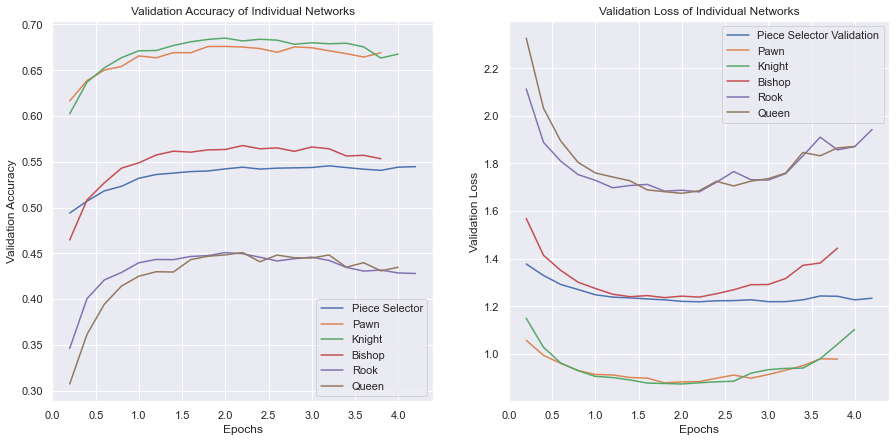

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

axs[0].plot(ps_accuracy.iterations_proportions, ps_accuracy.validAccuracies, label="Piece Selector")
axs[0].plot(p_accuracy.iterations_proportions, p_accuracy.validAccuracies, label="Pawn")
axs[0].plot(n_accuracy.iterations_proportions, n_accuracy.validAccuracies, label="Knight")
axs[0].plot(b_accuracy.iterations_proportions, b_accuracy.validAccuracies, label="Bishop")
axs[0].plot(r_accuracy.iterations_proportions, r_accuracy.validAccuracies, label="Rook")
axs[0].plot(q_accuracy.iterations_proportions, q_accuracy.validAccuracies, label="Queen")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Validation Accuracy")
axs[0].set_title("Validation Accuracy of Individual Networks")
axs[0].legend()
#axs[0].savefig(IMAGE_DIR + "network_validation_error.png")

axs[1].plot(ps_losses.iterations_proportions, ps_losses.validLosses, label="Piece Selector Validation")
axs[1].plot(p_losses.iterations_proportions, p_losses.validLosses, label="Pawn")
axs[1].plot(n_losses.iterations_proportions, n_losses.validLosses, label="Knight")
axs[1].plot(b_losses.iterations_proportions, b_losses.validLosses, label="Bishop")
axs[1].plot(r_losses.iterations_proportions, r_losses.validLosses, label="Rook")
axs[1].plot(q_losses.iterations_proportions, q_losses.validLosses, label="Queen")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Validation Loss")
axs[1].set_title("Validation Loss of Individual Networks")
axs[1].legend()


In [4]:
test_accuracy = pd.read_csv(RESULTS_DIR + 'testing_accuracies.csv')
test_accuracy

,network,accuracy
0,selector,0.482876
1,p,0.631662
2,b,0.522642
3,n,0.655040
4,r,0.392954
5,q,0.403853
6,k,0.524019


Text(0, 0.5, 'Testing Accuracy')

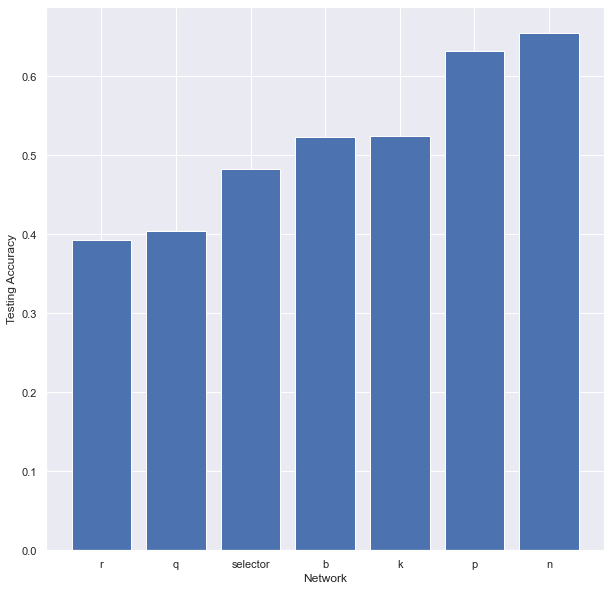

In [10]:
plt.figure(figsize=(10,10))
plt.bar(test_accuracy.sort_values(by="accuracy").network, test_accuracy.sort_values(by="accuracy").accuracy)
plt.xlabel("Network")
plt.ylabel("Testing Accuracy")

In [17]:
testing_results = pd.read_pickle(RESULTS_DIR + 'testing_results.pickle')

network              object
accuracy            float64
class_accuracy       object
confusion_matrix     object
dtype: object

In [52]:
testing_results

,network,accuracy,class_accuracy,confusion_matrix
0,selector,0.544117,"[tensor(0.4813), tensor(0.6279), tensor(0.4896...","[[tensor(3948.), tensor(88.), tensor(157.), te..."
1,p,0.675459,"[tensor(nan), tensor(nan), tensor(nan), tensor...","[[tensor(0.), tensor(0.), tensor(0.), tensor(0..."
2,b,0.561107,"[tensor(0.3472), tensor(0.2864), tensor(0.3042...","[[tensor(75.), tensor(0.), tensor(9.), tensor(..."
3,n,0.684059,"[tensor(0.4516), tensor(0.3050), tensor(0.4651...","[[tensor(28.), tensor(0.), tensor(4.), tensor(..."
4,r,0.451040,"[tensor(0.3777), tensor(0.4293), tensor(0.5315...","[[tensor(695.), tensor(45.), tensor(100.), ten..."
5,q,0.452383,"[tensor(0.2793), tensor(0.3025), tensor(0.3539...","[[tensor(93.), tensor(10.), tensor(8.), tensor..."
6,k,0.614075,"[tensor(0.6022), tensor(0.8076), tensor(0.5709...","[[tensor(1152.), tensor(104.), tensor(161.), t..."


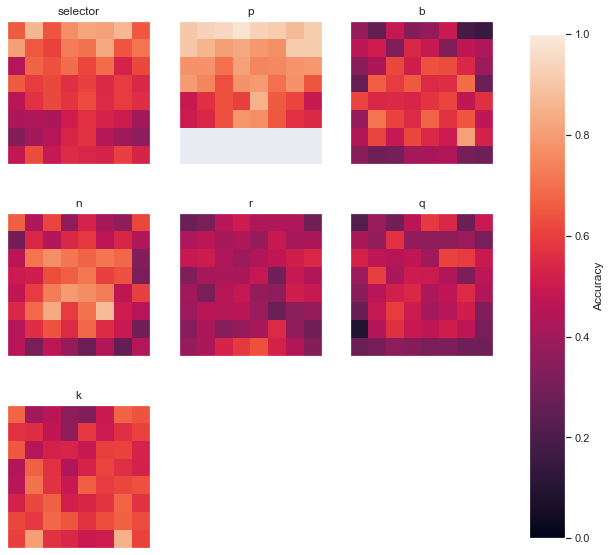

In [72]:
fig, axs = plt.subplots(3, 3, figsize=(10,10))
for i, ax in enumerate(axs.ravel()[:7]):
    im = ax.imshow(testing_results.class_accuracy.iloc[i].reshape(8,8).flip([0]), vmin=0, vmax=1)
    ax.set_title(testing_results.network.iloc[i])
    ax.grid(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
fig.delaxes(axs[2][1])
fig.delaxes(axs[2, 2])

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label("Accuracy")

